In [2]:
import sys
sys.path.insert(1, '/home/afkirby/PEnGUIn/read/Analysis')

In [3]:
from read_penguin import load_2D_data
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import geometry as geo
from Interpolate import *
from Search import binSearch
import multiprocessing as mp

In [4]:
def velocity(x, y, data):
    xVals = data[1]
    yVals = data[2]
    xVel = data[5]
    yVel = data[6]
    xPoints = binSearch(xVals, 0, len(xVals), x)
    yPoints = binSearch(yVals, 0, len(yVals), y)
    if(xPoints[0] == -np.infty):
        return (0,0)
    elif(xPoints[1] == np.infty):
        return (0,0)
    if(yPoints[0] == -np.infty):
        yPoints = (len(yVals)-2, 0)
    elif(yPoints[1] == np.infty):
        yPoints = (0, len(yVals)-2)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    xsquareVals = [xVel[lowy,lowx], xVel[highy,lowx], xVel[lowy,highx], xVel[highy,highx]]
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vx = biInterpolate(targetCoords, xsquareVals, minCoords, maxCoords)
    
    xVals = data[1]
    yVals = data[2]
    xVel = data[6]
    xPoints = binSearch(xVals, 0, len(xVals), x)
    yPoints = binSearch(yVals, 0, len(yVals), y)
    if(xPoints[0] == -np.infty):
        return (0,0)
    elif(xPoints[1] == np.infty):
        return (0,0)
    if(yPoints[0] == -np.infty):
        yPoints = (0, len(yVals)-2)
    elif(yPoints[1] == np.infty):
        yPoints = (len(yVals)-2, 0)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    xsquareVals = [xVel[lowy,lowx], xVel[highy,lowx], xVel[lowy,highx], xVel[highy,highx]]
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vy = biInterpolate(targetCoords, xsquareVals, minCoords, maxCoords)
    
    vels = (vx, vy)
    return geo.sphericalToCartesianVelocity(targetCoords, vels, dim=2)

In [5]:
def cartVelocity(x, y, xVals, yVals, xVel, yVel):
    if(x >= xVals[-1] or x <= xVals[0]):
        return (0,0)
    if(y >= yVals[-1] or y <= yVals[0]):
        return (0,0)
    xPoints = binSearch(xVals, 0, len(xVals), x)
    yPoints = binSearch(yVals, 0, len(yVals), y)
    if(xPoints[0] == -np.infty):
        xPoints = (0,0)
    elif(xPoints[1] == np.infty):
        xPoints = (0,0)
    if(yPoints[0] == -np.infty):
        yPoints = (0,0)
    if(yPoints[1] == np.infty):
        yPoints = (0,0)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    xsquareVals = [xVel[lowy,lowx], xVel[highy,lowx], xVel[lowy,highx], xVel[highy,highx]]
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vx = biInterpolate(targetCoords, xsquareVals, minCoords, maxCoords)
    
    xPoints = binSearch(xVals, 0, len(xVals), x)
    yPoints = binSearch(yVals, 0, len(yVals), y)
    if(xPoints[0] == -np.infty):
        return (0,0)
    elif(xPoints[1] == np.infty):
        return (0,0)
    if(yPoints[0] == -np.infty):
        yPoints = (0, len(yVals)-2)
    elif(yPoints[1] == np.infty):
        yPoints = (len(yVals)-2, 0)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    xsquareVals = [xVel[lowy,lowx], xVel[highy,lowx], xVel[lowy,highx], xVel[highy,highx]]
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vy = biInterpolate(targetCoords, xsquareVals, minCoords, maxCoords)
    
    vels = (vx, vy)
    v = geo.cartesianToSphericalVelocity(targetCoords, vels, dim = 2)
    return v

In [6]:
#Loading Data
xres = 384
yres = 768
filepath = "/home/afkirby/penguinPlots/2DGammaChange/"
gam10data = load_2D_data("/scratch/afkirby/2DAdiabaticParameterChange/Gamma1.0/", xres, yres, "h50_1p1J_e0_PPM4", 0)

In [7]:
def populateR(i, data):
    return data[1][0] + (data[1][-2] - data[1][0])*i/1000

def populateTheta(i, data):
    return data[2][0] + (data[2][-2] - data[2][0])*i/1000

StarR = np.ndarray(1001)
StarTheta = np.ndarray(1001)
for i in range(1001):
    StarR[i] = populateR(i, gam10data)
    StarTheta[i] = populateTheta(i, gam10data)

In [8]:
newDataX = np.ndarray((1001,1001))
newDataY = np.ndarray((1001,1001))

for i in range(1001):
    for j in range(1001):
        x = StarR[i]
        y = StarTheta[j]
        xVals = gam10data[1]
        yVals = gam10data[2]
        xVel = gam10data[5]
        xPoints = binSearch(xVals, 0, len(xVals), x)
        yPoints = binSearch(yVals, 0, len(yVals), y)
        if(xPoints[0] == -np.infty):
            newDataX[i,j] = 0
            break
        elif(xPoints[1] == np.infty):
            newDataX[i,j] = 0
            break
        if(yPoints[0] == -np.infty):
            yPoints = (0, len(yVals)-2)
        elif(yPoints[1] == np.infty):
            yPoints = (len(yVals)-2, 0)
        lowx = xPoints[0]
        highx = xPoints[1]
        lowy = yPoints[0]
        highy = yPoints[1]
        xsquareVals = [xVel[lowy,lowx], xVel[highy,lowx], xVel[lowy,highx], xVel[highy,highx]]
        targetCoords = (x,y)
        minCoords = (xVals[lowx], yVals[lowy])
        maxCoords = (xVals[highx], yVals[highy])
        vx = biInterpolate(targetCoords, xsquareVals, minCoords, maxCoords)
    
        xVals = gam10data[1]
        yVals = gam10data[2]
        xVel = gam10data[6]
        xPoints = binSearch(xVals, 0, len(xVals), x)
        yPoints = binSearch(yVals, 0, len(yVals), y)
        if(xPoints[0] == -np.infty):
            newDataY[i,j] = 0
            break
        elif(xPoints[1] == np.infty):
            newDataY[i,j] = 0
            break
        if(yPoints[0] == -np.infty):
            yPoints = (0, len(yVals)-2)
        elif(yPoints[1] == np.infty):
            yPoints = (len(yVals)-2, 0)
        lowx = xPoints[0]
        highx = xPoints[1]
        lowy = yPoints[0]
        highy = yPoints[1]
        xsquareVals = [xVel[lowy,lowx], xVel[highy,lowx], xVel[lowy,highx], xVel[highy,highx]]
        targetCoords = (x,y)
        minCoords = (xVals[lowx], yVals[lowy])
        maxCoords = (xVals[highx], yVals[highy])
        vy = biInterpolate(targetCoords, xsquareVals, minCoords, maxCoords)
        newDataX[i,j] = vx
        newDataY[i,j] = vy

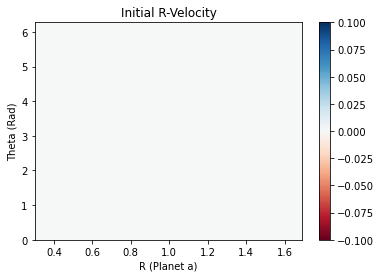

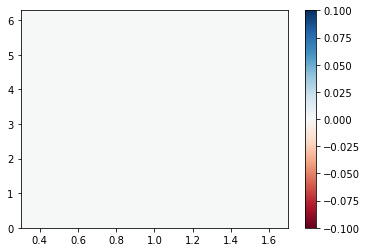

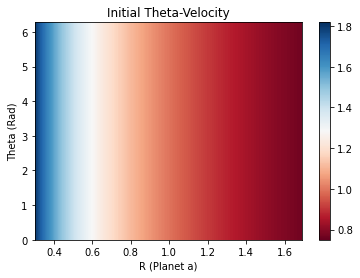

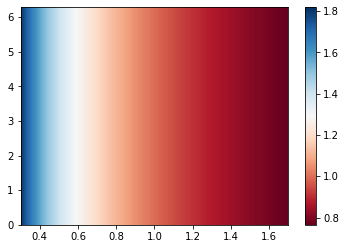

In [8]:
plt.figure()
plt.pcolor(gam10data[1], gam10data[2], gam10data[5], cmap = "RdBu")
plt.colorbar()
plt.show()

plt.figure()
plt.pcolor(gam10data[1], gam10data[2], gam10data[6], cmap = "RdBu")
plt.colorbar()
plt.show()

In [ ]:
plt.figure()
plt.pcolor(StarR, StarTheta, np.transpose(newDataX), vmin = -0.1, vmax = 0.1, cmap = "RdBu")
plt.xlabel("R (Planet a)")
plt.ylabel("Theta (Rad)")
plt.title("Initial R-Velocity")
plt.colorbar()
plt.show()

plt.figure()
plt.pcolor(StarR, StarTheta, np.transpose(newDataY), vmin = 0.75, cmap = "RdBu")
plt.xlabel("R (Planet a)")
plt.ylabel("Theta (Rad)")
plt.title("Initial Theta-Velocity")
plt.colorbar()
plt.show()


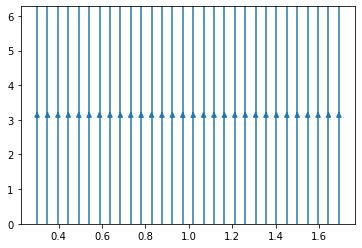

In [9]:
plt.streamplot(StarR, StarTheta, newDataX, newDataY)
plt.show()

In [14]:
#Planetary Coordinates/Velocity
planetCoords = (1, np.pi)
planetCoordsCart = geo.sphericalToCartesian(planetCoords, dim = 2)
planetVel = (0, 1)
planetVelCart = geo.sphericalToCartesianVelocity(planetCoords, planetVel, dim = 2)

In [11]:
#Creating Corotating Cartesian Grid
coordX = np.ndarray(1001)
coordY = np.ndarray(1001)
for i in range(1001):
    coordX[i] = -gam10data[1][-1] + 2*gam10data[1][-1]*(i)/1000
    
for j in range(1001):
    coordY[j] = -gam10data[1][-1] + 2*gam10data[1][-1]*(j)/1000

gam10rCo = gam10data[5]
gam10thetaCo = gam10data[6]
for i in range(xres):
    for j in range(yres):
        gam10thetaCo[j,i] = gam10thetaCo[j,i] - planetVel[1]*gam10data[1][i]
gam10velCartX = np.ndarray((1001,1001))
gam10velCartY = np.ndarray((1001,1001))
gam10dataCo = [gam10data[0], gam10data[1], gam10data[2], gam10data[3], gam10data[4], gam10rCo, gam10thetaCo]
for i in range(1001):
    for j in range(1001):
        cartesian = (coordX[i], coordY[j])
        polar = geo.cartesianToSpherical(cartesian, 2)
        velocities = velocity(polar[0], polar[1], gam10dataCo)
        gam10velCartX[j,i] = velocities[0]
        gam10velCartY[j,i] = velocities[1]

/home/afkirby/PEnGUIn/read/Analysis/geometry.py:28: RuntimeWarning: invalid value encountered in double_scalars
  phi = np.arccos(z/r)


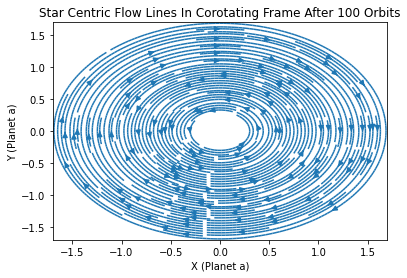

In [12]:
plt.figure()
plt.streamplot(coordX, coordY, gam10velCartX, gam10velCartY, density = 3)
plt.title("Star Centric Flow Lines In Corotating Frame After 100 Orbits")
plt.xlabel("X (Planet a)")
plt.ylabel("Y (Planet a)")
#plt.savefig("CartesianFlowAroundStar.png")
plt.show()

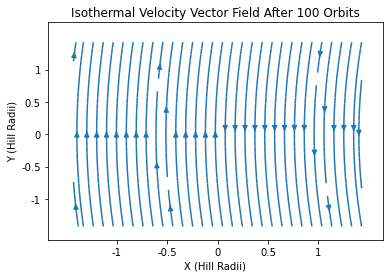

In [13]:
#Focusing Around The Planet
coordXSmall = np.ndarray(1001)
coordYSmall = np.ndarray(1001)
for i in range(1001):
    coordXSmall[i] = -1.1 + 0.2*(i)/1000
    
for j in range(1001):
    coordYSmall[j] = -0.1 + 0.2*(j)/1000

gam10velCartXSmall = np.ndarray((1001,1001))
gam10velCartYSmall = np.ndarray((1001,1001))
gam10dataCo = [gam10data[0], gam10data[1], gam10data[2], gam10data[3], gam10data[4], gam10rCo, gam10thetaCo]
for i in range(1001):
    for j in range(1001):
        cartesian = (coordXSmall[i], coordYSmall[j])
        polar = geo.cartesianToSpherical(cartesian, 2)
        velocities = velocity(polar[0], polar[1], gam10dataCo)
        gam10velCartXSmall[j,i] = velocities[0]
        gam10velCartYSmall[j,i] = velocities[1]
for i in range(1001):
    coordX[i] = coordX[i] - planetCoordsCart[0]
    coordXSmall[i] = coordXSmall[i] - planetCoordsCart[0]
    coordY[i] = coordY[i] - planetCoordsCart[1]
    coordYSmall[i] = coordYSmall[i] - planetCoordsCart[1]
plt.figure()
plt.streamplot(coordXSmall, coordYSmall, gam10velCartXSmall, gam10velCartYSmall, density = 1)
plt.xticks([-0.07,-0.035,0 , 0.035,0.07], [-1, -0.5, 0, 0.5, 1])
plt.xlabel("X (Hill Radii)")
plt.yticks([-0.07,-0.035,0 , 0.035,0.07], [-1, -0.5, 0, 0.5, 1])
plt.ylabel("Y (Hill Radii)")
plt.title("Isothermal Velocity Vector Field After 100 Orbits")
#plt.savefig("VelocityAroundPlanet.png")
plt.show()

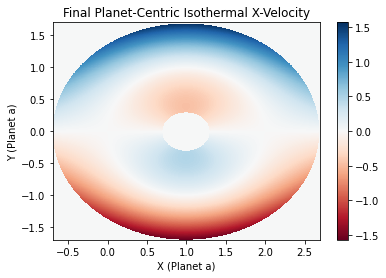

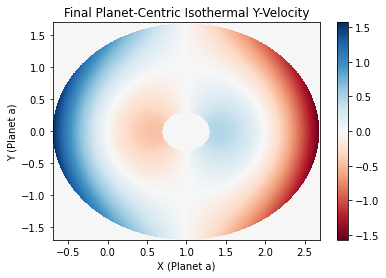

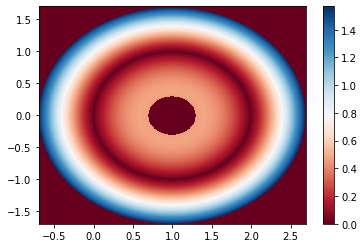

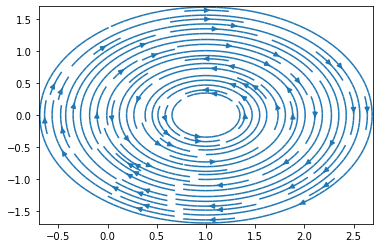

In [14]:
plt.figure()
plt.pcolor(coordX, coordY, gam10velCartX, cmap = "RdBu")
plt.title("Final Planet-Centric Isothermal X-Velocity")
plt.xlabel("X (Planet a)")
plt.ylabel("Y (Planet a)")
plt.colorbar()
plt.show()

plt.figure()
plt.pcolor(coordX, coordY, gam10velCartY, cmap = "RdBu")
plt.title("Final Planet-Centric Isothermal Y-Velocity")
plt.xlabel("X (Planet a)")
plt.ylabel("Y (Planet a)")
plt.colorbar()
plt.show()

vtot = np.sqrt(gam10velCartX**2 + gam10velCartY**2)
plt.figure()
plt.pcolor(coordX, coordY, vtot, cmap = "RdBu")
plt.colorbar()
plt.show()

plt.streamplot(coordX, coordY, gam10velCartX, gam10velCartY, density = 1.5)

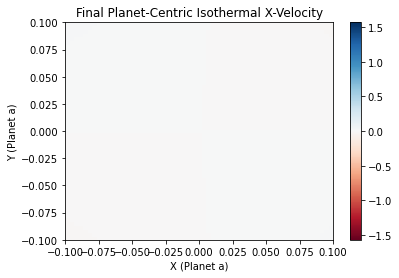

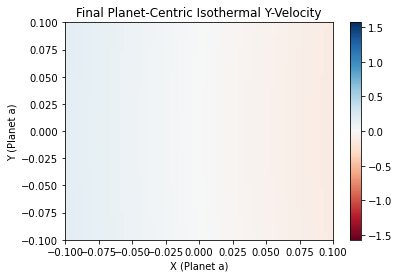

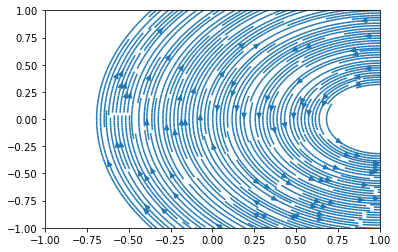

In [15]:
plt.figure()
plt.pcolor(coordX, coordY, gam10velCartX, cmap = "RdBu")
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.title("Final Planet-Centric Isothermal X-Velocity")
plt.xlabel("X (Planet a)")
plt.ylabel("Y (Planet a)")
plt.colorbar()
plt.show()

plt.figure()
plt.pcolor(coordX, coordY, gam10velCartY, cmap = "RdBu")
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.title("Final Planet-Centric Isothermal Y-Velocity")
plt.xlabel("X (Planet a)")
plt.ylabel("Y (Planet a)")
plt.colorbar()
plt.show()

plt.figure()
plt.streamplot(coordX, coordY, gam10velCartX, gam10velCartY, density = 5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [16]:
#Creating Planet-Centric Polar Grid
gam10VelPlanetX = np.ndarray((xres+1, yres+1))
gam10VelPlanetY = np.ndarray((xres+1, yres+1))
planetR = np.ndarray(xres+1)
planetTheta = np.ndarray(yres+1)
rs = 0.01
for i in range(xres+1):
    planetR[i] = 0.2*i/(xres) + rs
for j in range(yres+1):
    planetTheta[j] = 2*np.pi*j/(yres)
    
for i in range(xres+1):
    for j in range(yres+1):
        polar = (planetR[i], planetTheta[j])
        cartesian = geo.sphericalToCartesian(polar, 2)
        velocities = cartVelocity(cartesian[0], cartesian[1], coordX, coordY, gam10velCartX, gam10velCartY)
        gam10VelPlanetX[i,j] = velocities[0]
        gam10VelPlanetY[i,j] = velocities[1]

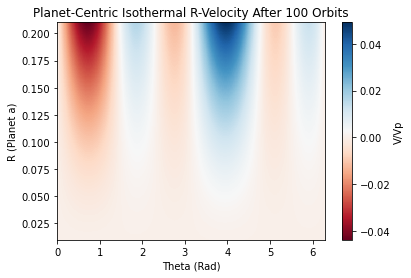

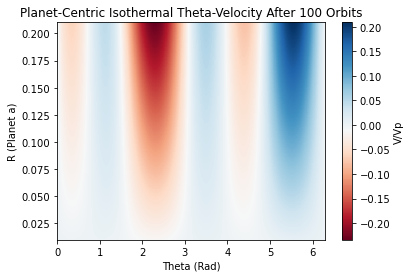

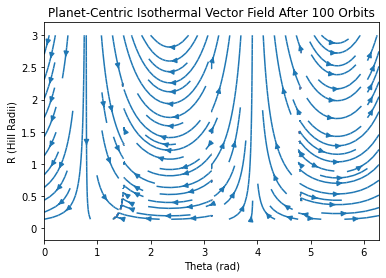

In [17]:
plt.figure()
plt.pcolor(planetTheta, planetR, gam10VelPlanetX, cmap = "RdBu")
plt.title("Planet-Centric Isothermal R-Velocity After 100 Orbits")
plt.xlabel("Theta (Rad)")
plt.ylabel("R (Planet a)")
plt.colorbar(label = 'V/Vp')
plt.show()

plt.figure()
plt.pcolor(planetTheta, planetR, gam10VelPlanetY, cmap = "RdBu")
plt.title("Planet-Centric Isothermal Theta-Velocity After 100 Orbits")
plt.xlabel("Theta (Rad)")
plt.ylabel("R (Planet a)")
plt.colorbar(label = 'V/Vp')
plt.show()

plt.figure()
plt.streamplot(planetTheta, planetR, gam10VelPlanetY, gam10VelPlanetX)
plt.title("Planet-Centric Isothermal Vector Field After 100 Orbits")
plt.yticks([0, 0.035, 0.07, 0.105, 0.14, 0.175, 0.21], [0, 0.5, 1, 1.5, 2, 2.5,3])
plt.ylabel("R (Hill Radii)")
plt.xlabel("Theta (rad)")
#plt.savefig("PolarFlowAroundPlanet.png")
plt.show()

Transforming Densities

In [9]:
def density(x, y, data):
    #Parsing relevant parts of data input
    xVals = data[1]
    yVals = data[2]
    dens = data[3]
    
    #Finding indices in the data between which the target points lie
    xPoints = binSearch(xVals, 0, len(xVals), x)
    yPoints = binSearch(yVals, 0, len(yVals), y)
    
    #Applying Polar Boundary Conditions (y in this case is angle, so it should be periodic but x is radius so anything outside of data set is made to be 0)
    if(xPoints[0] == -np.infty):
        return 0
    elif(xPoints[1] == np.infty):
        return 0
    if(yPoints[0] == -np.infty):
        yPoints = (0, len(yVals)-2)
    elif(yPoints[1] == np.infty):
        yPoints = (len(yVals)-2, 0)
    
    #Setting up grid points for interpolation (these are the indices of the square lattice points)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    
    #Creating values at each square lattice point and interpolating
    squareVals = [dens[lowy,lowx], dens[highy,lowx], dens[lowy,highx], dens[highy,highx]]
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    den = biInterpolate(targetCoords, squareVals, minCoords, maxCoords)
    return den

In [10]:
def cartDensity(x, y, xVals, yVals, dens):
    xPoints = binSearch(xVals, 0, len(xVals), x)
    yPoints = binSearch(yVals, 0, len(yVals), y)
    if(xPoints[0] == -np.infty or yPoints[0] == -np.infty):
        return 0
    if(xPoints[1] == np.infty or yPoints[1] == np.infty):
        return 0
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    squareVals = [dens[lowy,lowx], dens[highy,lowx], dens[lowy,highx], dens[highy,highx]]
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    den = biInterpolate(targetCoords, squareVals, minCoords, maxCoords)
    return den

In [11]:
coordXDen = np.ndarray(1001)
coordYDen = np.ndarray(1001)

for i in range(1001):
    coordXDen[i] = -gam10data[1][-1] + 2*gam10data[1][-1]*(i)/1000
    
for j in range(1001):
    coordYDen[j] = -gam10data[1][-1] + 2*gam10data[1][-1]*(j)/1000
gam10denCart = np.ndarray((1001,1001))
for i in range(1001):
    for j in range(1001):
        cartesian = (coordXDen[i], coordYDen[j])
        polar = geo.cartesianToSpherical(cartesian, 2)
        gam10denCart[j,i] = density(polar[0], polar[1], gam10data)

/home/afkirby/PEnGUIn/read/Analysis/geometry.py:28: RuntimeWarning: invalid value encountered in double_scalars
  phi = np.arccos(z/r)


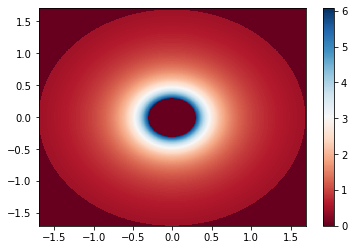

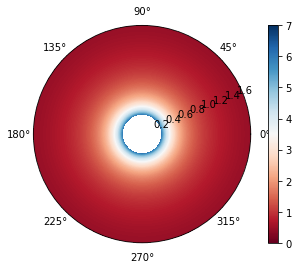

In [12]:
plt.figure()
plt.pcolor(coordYDen, coordXDen, gam10denCart, cmap = "RdBu")
plt.colorbar()

fig, ax = plt.subplots(subplot_kw = {'projection': 'polar'})
ax.grid(False)
plt.pcolormesh(gam10data[2], gam10data[1], np.transpose(gam10data[3]), cmap = "RdBu", vmin = 0, vmax = 7)
plt.colorbar()
plt.show()

In [15]:
#Shifting Cartesian Grid to be planet-centric
for i in range(1001):
    coordXDen[i] = coordXDen[i] - planetCoordsCart[0]
    coordYDen[i] = coordYDen[i] - planetCoordsCart[1]

#Creating planet-centric polar grid
gam10denplanet = np.ndarray((xres+1, yres+1))
planetRDen = np.ndarray(xres+1)
planetThetaDen = np.ndarray(yres+1)
for i in range(xres+1):
    planetRDen[i] = 0.2*i/(xres)
for j in range(yres+1):
    planetThetaDen[j] = 2*np.pi*j/(yres)

#Interpolating over cartesian grid to find data for the new, planet-centric, polar grid
for i in range(xres+1):
    for j in range(yres+1):
        polar = (planetRDen[i], planetThetaDen[j])
        cartesian = geo.sphericalToCartesian(polar, 2)
        gam10denplanet[i,j] = cartDensity(cartesian[0], cartesian[1], coordXDen, coordYDen, gam10denCart)

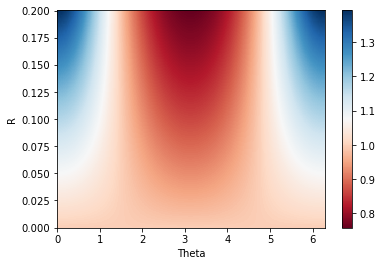

In [17]:
plt.figure()
plt.pcolor(planetThetaDen, planetRDen, gam10denplanet, cmap = "RdBu")
plt.xlabel("Theta")
plt.ylabel("R")
plt.colorbar()

In [24]:
def trapStep(a, b, f):
    return abs(b-a)*(f(b) + f(a))/2

def intTrap(a, b, n, f):
    h = abs(b-a)/n
    total = 0
    for i in range(n):
        xi = a + h*i
        xf = a + h*(i+1)
        total = total + trapStep(xi, xf, f)
    return total

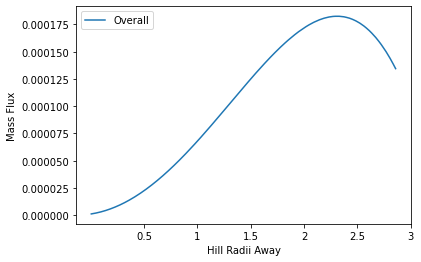

In [25]:
def findMassFlux(theta, den, velx, thetas, radius):
    points = binSearch(thetas, 0, len(thetas), theta)
    if(points[0] == -np.infty):
        points = (len(thetas)-1, 0)
    elif(points[1] == np.infty):
        points = (0, len(thetas)-1)
    low = points[0]
    high = points[1]
    minposition = thetas[low]
    maxposition = thetas[high]
    
    #Interpolating Density
    mindata = den[low]
    maxdata = den[high]
    density = linInterpolate(theta, minposition, maxposition, mindata, maxdata)
    
    #Interpolating X-Velocity
    mindata = velx[low]
    maxdata = velx[high]
    xVelocity = linInterpolate(theta, minposition, maxposition, mindata, maxdata)
    
    return density*xVelocity*radius

massflows = []
massin = []
massout = []
for i in range(xres):
    circularDens = gam10denplanet[i]
    circularXVels = gam10VelPlanetX[i]
    circularYVels = gam10VelPlanetY[i]

    r = planetR[i]
    h = 2*np.pi/xres
    total = 0
    totalin = 0
    totalout = 0
    for j in range(xres):
        xi = h*j
        xf = h*(j+1)
        fleft = findMassFlux(xi, circularDens, circularXVels, planetTheta, r)
        fright = findMassFlux(xf, circularDens, circularXVels, planetTheta, r)
        total = total + abs(xf-xi)*(fleft + fright)/2
        '''if(np.sign(fleft) == np.sign(fright)):
            if (fleft >= 0):
                totalin = totalin + total
            else:
                totalout = totalout - total
        else:
            xroot = findzero(xi, xf, fleft, fright)
            if(np.sign(fleft) >= 0):
                totalin = totalin + abs(xroot - xi)*fleft/2
                totalout = totalout + abs(xf - xroot)*fright/2
            else:
                totalin = totalin + abs(xf - xroot)*fright/2
                totalout = totalout + abs(xroot - xi)*fleft/2'''
    massflows.append(total)
    '''massin.append(totalin)
    massout.append(totalout)'''
plt.plot(planetRDen[1:], massflows, label = "Overall")
'''plt.plot(planetR[1:], massin, label = "Positive Flux")
plt.plot(planetR[1:], massout, label = "Negative Flux")'''
plt.xticks([0.035,0.07, 0.105, 0.14, 0.175, 0.21],[0.5,1,1.5,2,2.5,3])
plt.xlabel("Hill Radii Away")
plt.ylabel("Mass Flux")
plt.legend()
plt.show()

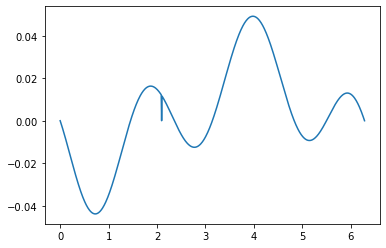

In [26]:
R = 0.07*3
xPoints = binSearch(planetR, 0, len(planetR), R)
plt.plot(planetTheta, gam10VelPlanetX[xPoints[0]])

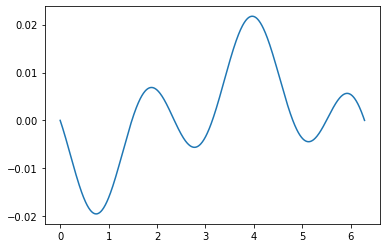

In [27]:
R = 0.07*2
xPoints = binSearch(planetR, 0, len(planetR), R)
plt.plot(planetTheta, gam10VelPlanetX[xPoints[0]])